### 曲线拟合

导入基础包：

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 多项式拟合

导入线多项式拟合工具：

In [2]:
from numpy import polyfit, poly1d

产生数据：

In [5]:
x = np.linspace(-5, 5, 100)
y = 4 * x +1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5

画出数据：

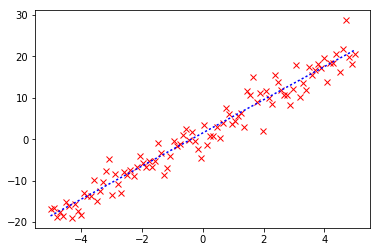

In [12]:
%matplotlib inline

p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')

进行线性拟合，polyfit是多项式拟合函数，线性拟合即一阶多项式：

In [13]:
coeff = polyfit(x, noise_y, 1)
print(coeff)

[ 4.010354    1.34733025]


一阶多项式 $y = a_1 x + a_0$ 拟合， 返回两个系数 [$a_1, a_0$]

画出拟合曲线：

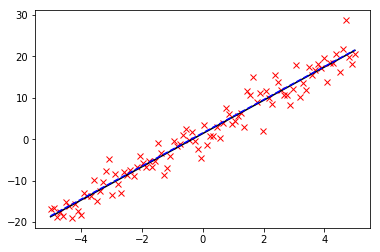

In [18]:
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0]*x+coeff[1], 'k-')
p = plt.plot(x, y, 'b--')

还可以用poly1d生成一个以传入的coeff为参数的多项式函数：

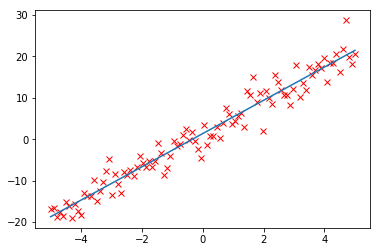

In [19]:
f = poly1d(coeff)
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, f(x))

In [20]:
f

poly1d([ 4.010354  ,  1.34733025])

显示f：

In [21]:
print(f)

 
4.01 x + 1.347


还可以对它进行数学操作生成新的多项式：

In [22]:
print(f + 2 * f ** 2)

       2
32.17 x + 25.62 x + 4.978


#### 多项式拟合正弦函数

正弦函数：

In [24]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

用一到九阶多项式拟合，类似泰勒展开：

In [25]:
y1 = poly1d(polyfit(x, y, 1))
y3 = poly1d(polyfit(x, y, 3))
y5 = poly1d(polyfit(x, y, 5))
y7 = poly1d(polyfit(x, y, 7))
y8 = poly1d(polyfit(x, y, 8))
y9 = poly1d(polyfit(x, y, 9))

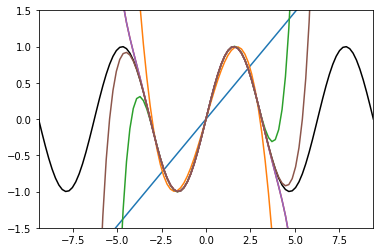

In [28]:
x = np.linspace(-3*np.pi, 3*np.pi, 100)

p = plt.plot(x, np.sin(x), 'k')
p = plt.plot(x, y1(x))
p = plt.plot(x, y3(x))
p = plt.plot(x, y5(x))
p = plt.plot(x, y7(x))
p = plt.plot(x, y8(x))
p = plt.plot(x, y9(x))

a = plt.axis([-3*np.pi, 3*np.pi, -1.5, 1.5])

黑色为原始的图形，可以看到，随着多项式拟合的阶数的增加，曲线与拟合数据的吻合程度在逐渐增大。

#### 最小二乘拟合

导入相关的模块：

In [29]:
from scipy.linalg import lstsq
from scipy.stats import linregress

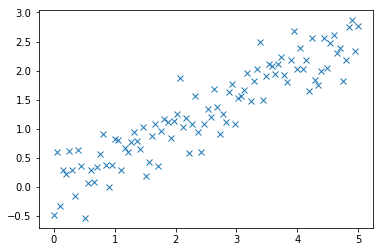

In [31]:
x = np.linspace(0, 5, 100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35

plt.plot(x, y, 'x')

一般来说，我们使用一个N-1阶的多项式拟合这M个点时，有这样的关系：
$$XC = Y$$
即

$
\left[
\begin{matrix}
x_0^{N-1} & ... & x_0 & 1  \\
x_1^{N-1} & ... & x_1 & 1  \\
...     & ... & ... & ...  \\
x_M^{N-1} & ... & x_M & 1
\end{matrix}\right]
$
$
\left[
\begin{matrix}
C_{N-1} \\
... \\
C_1      \\
C_0
\end{matrix}
\right]
$
$
 = 
$ 
$
\left[
\begin{matrix}
y_0  \\
y_1  \\
...  \\
y_M  
\end{matrix}
\right]
$


#### Scipy.linalg.lstsq 最小二乘解

要得到C， 可以使用 scipy.linalg.lstsq求最小二乘解。

这里，我们使用1阶多项式N = 2，先将x扩展成X：

In [32]:
X = np.hstack((x[:, np.newaxis], np.ones((x.shape[-1],1))))
X[1:5]

array([[ 0.05050505,  1.        ],
       [ 0.1010101 ,  1.        ],
       [ 0.15151515,  1.        ],
       [ 0.2020202 ,  1.        ]])

求解：

In [35]:
C, resid, rank, s = lstsq(X, y)
C, resid, rank, s

(array([ 0.51864437, -0.00469531]),
 10.026682599103275,
 2,
 array([ 30.23732043,   4.82146667]))

画图：

sum squared residual = 10.027
rank of the X matrix = 2
singular values of X = [ 30.23732043   4.82146667]


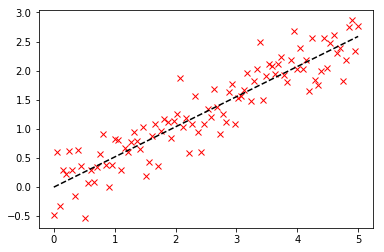

In [36]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, C[0] * x + C[1], 'k--')
print("sum squared residual = {:.3f}".format(resid))
print("rank of the X matrix = {}".format(rank))
print("singular values of X = {}".format(s))

#### Scipy.stats.linregress 线性回归

对于上面的问题，还可以使用线性回归进行求解：

In [38]:
slope, intercept, r_value, p_value, stderr = linregress(x, y)
slope, intercept

(0.51864437078133607, -0.0046953056148026917)

R-value = 0.922
p-value (probability there is no correlation) = 2.855e-42
Root mean squared error of the fit = 0.148


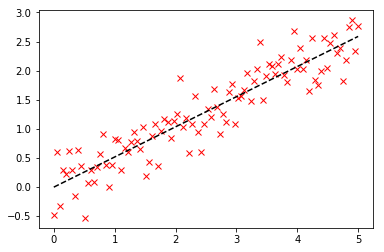

In [39]:
p = plt.plot(x, y, 'rx')
p = plt.plot(x, slope * x + intercept, 'k--')
print("R-value = {:.3f}".format(r_value))
print("p-value (probability there is no correlation) = {:.3e}".format(p_value))
print("Root mean squared error of the fit = {:.3f}".format(np.sqrt(stderr)))

可以看到，两者求解的结果是一致的，但是出发的角度是不同的。

### 更高级的拟合

In [40]:
from scipy.optimize import leastsq

先定义这个非线性函数： $y = ae^{-bsin(fx+\theta)}$

In [41]:
def function(x, a, b, f, phi):
    """a function if x with four paramaeters"""
    result = a * np.exp(-b * np.sin(f * x + phi))
    return result

画出原始曲线：

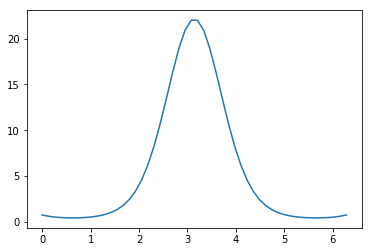

In [43]:
x = np.linspace(0, 2*np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi/4]
y = function(x, *actual_parameters)
p = plt.plot(x, y)

加入噪声：

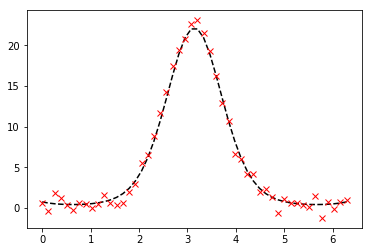

In [45]:
from scipy.stats import norm
y_noisy = y + 0.8 * norm.rvs(size=len(x))
p = plt.plot(x, y, 'k--')
p = plt.plot(x, y_noisy, 'rx')

#### Scipy.optimize.leastsq

定义误差函数，将要优化的参数放在前面：

In [46]:
def f_err(p, y, x):
    return y - function(x, *p)

将这个函数作为参数传入leastsq函数，第二个参数为初始值：

In [47]:
c, ret_val = leastsq(f_err, [1, 1, 1, 1], args=(y_noisy, x))
c, ret_val

(array([ 2.80383347,  2.09631168,  1.23729433,  0.85084907]), 1)

ret_val 是1～4时，表示成功找到最小二乘解：

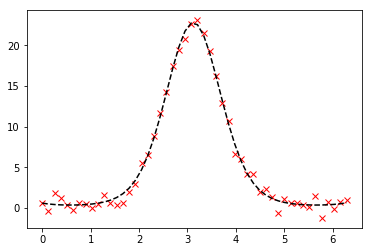

In [48]:
p = plt.plot(x, y_noisy, 'rx')
p = plt.plot(x, function(x, *c), 'k--')

#### Scipy.optimize.curve_fit

更高级的做法：

In [49]:
from scipy.optimize import curve_fit

不需要定义误差函数，直接传入function作为参数：

In [50]:
p_est, err_est = curve_fit(function, x, y_noisy)

[ 2.80383354  2.09631166  1.23729435  0.85084904]


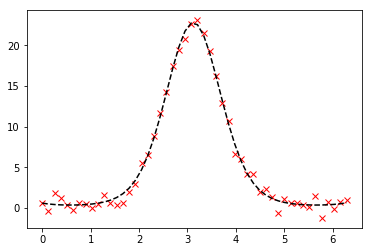

In [51]:
print(p_est)
p = plt.plot(x, y_noisy, 'rx')
p = plt.plot(x, function(x, *p_est), 'k--')

这里第一个返回的是函数的参数，第二个返回值为各个参数的协方差矩阵：

In [52]:
print(err_est)

[[ 0.1575386  -0.05558565  0.01875753 -0.05855231]
 [-0.05558565  0.01978367 -0.00651898  0.02034929]
 [ 0.01875753 -0.00651898  0.00253971 -0.00792772]
 [-0.05855231  0.02034929 -0.00792772  0.02486677]]


协方差矩阵的对角线为各个参数的方差：

In [53]:
print('normalized relative errors for each parameter')
print('  a\t  b\t  f\t phi')
print(np.sqrt(err_est.diagonal())/p_est)

normalized relative errors for each parameter
  a	  b	  f	 phi
[ 0.14156023  0.06709615  0.04073047  0.18533489]
